In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from classification_report import ClassificationReport

# 1.0 Introduction
----
Recognition of handwritten digits is a classic classification problem in
area of ​​computer vision. The problem is to receive an image of a number
handwritten, coded in shades of gray, and classify the decimal digit (0-9) contained therein. For
students and researchers of machine learning techniques, the MNIST dataset, whose
examples of instances are illustrated in Figure 1, it is used for comparison of techniques,
competitions and construction of new solutions.

# 2.0 Adapted MNIST Dataset
----
#### Pre-Processing

In [2]:
df_train = pd.read_csv("train.csv",sep=";")
df_train.head()
#dataset with numbers 0,1,4,5

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df_test = pd.read_csv("test.csv",sep=";")
df_test.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#Transforming the Dataset into arrays
X_train = np.array(df_train.iloc[:,1:]) #all rows and columns starting from label
y_train = np.array(df_train.iloc[:,0]) #label column only

X_test = np.array(df_test.iloc[:,1:])
y_test = np.array(df_test.iloc[:,0])

In [5]:
print(type(X_train[0]))
print(X_train[0].shape)
print("Classification: ",y_train[0])
X_train[0]

<class 'numpy.ndarray'>
(784,)
Classification:  0


array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  89, 255, 254, 151,
         8,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6, 191, 253,
       253, 253, 167,  76,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   7, 13

# 3.0 Description of Activities
----
#### 3.1 Sample Size Reduction

In [6]:
def intensity(digit):
    return sum(digit)/255

In [7]:
intensity_X_train = np.array([intensity(digit) for digit in X_train])
intensity_X_test = np.array([intensity(digit) for digit in X_test])

for i in range(5):
    print(f"Intensity of digit {y_train[i]}: {intensity_X_train[i]}")

Intensity of digit 0: 145.43529411764706
Intensity of digit 0: 118.5764705882353
Intensity of digit 0: 127.6
Intensity of digit 0: 138.04705882352943
Intensity of digit 0: 146.2156862745098


In [8]:
def vertical_symmetry(digit): #Add with horizontal symmetry

    digit = digit.reshape(28,28)
    result = []
    for i in range(28):#iterate over each line of the digit
        aux = []
        for j in range(14): #iterate to the middle of the line
            diff = abs( digit[i][j] - digit[i][27 - j] )
            aux.append(diff) #calculate each difference and add it to the row's diff vector

        result.append(sum(aux)) #sums the line differences and adds them to the digit difference vector

    return sum(result) / 255

In [9]:
def horizontal_symmetry(digit):

  digit = digit.reshape(28,28)
  result = []
  for i in range(28):#iterate over each column of the digit
    aux = []
    for j in range(14):#iterate halfway through the column
      diff = abs(digit[j][i] - digit[27-j][i])
      aux.append(diff) #calculate each difference and add it to the column difference vector

    result.append(sum(aux)) #sums the column differences and adds them to the digit difference vector

  return sum(result) / 255

In [10]:
vertical_symmetry_X_train = np.array([vertical_symmetry(digito) for digito in X_train])
vertical_symmetry_X_test = np.array([vertical_symmetry(digito) for digito in X_test])

for i in range(5):
    print(f"Vertical symmetry of digit {y_train[i]}: {vertical_symmetry_X_train[i]}")

Vertical symmetry of digit 0: 78.32156862745099
Vertical symmetry of digit 0: 71.00784313725491
Vertical symmetry of digit 0: 56.61960784313725
Vertical symmetry of digit 0: 74.50196078431372
Vertical symmetry of digit 0: 57.59607843137255


In [11]:
horizontal_symmetry_X_train = np.array([vertical_symmetry(digito) for digito in X_train])
horizontal_symmetry_X_test = np.array([vertical_symmetry(digito) for digito in X_test])

for i in range(5):
    print(f"Horizontal symmetry of the digit {y_train[i]}: {horizontal_symmetry_X_train[i]}")

Horizontal symmetry of the digit 0: 78.32156862745099
Horizontal symmetry of the digit 0: 71.00784313725491
Horizontal symmetry of the digit 0: 56.61960784313725
Horizontal symmetry of the digit 0: 74.50196078431372
Horizontal symmetry of the digit 0: 57.59607843137255


In [12]:
#symmetry = vertical_symmetry + horizontal_symmetry
simetry_X_train = np.add(vertical_symmetry_X_train, horizontal_symmetry_X_train)
symmetry_X_test = np.add(vertical_symmetry_X_test, horizontal_symmetry_X_test)

In [13]:
#writing a new csv file with the new features (intensity and vertical symmetry)
df_train = pd.DataFrame()
df_train["label"] = y_train
df_train["intensity"] = intensity_X_train
df_train["simetry"] = simetry_X_train

#Saving in csv
df_train.to_csv("train_redu.csv",sep=";",index=False) #remove the index to not give an error in the separator

df_train.head(5)

,label,intensity,simetry
0,0,145.435294,156.643137
1,0,118.576471,142.015686
2,0,127.600000,113.239216
3,0,138.047059,149.003922
4,0,146.215686,115.192157


In [14]:
df_test = pd.DataFrame()
df_test["label"] = y_test
df_test["intensity"] = intensity_X_test
df_test["symmetry"] = symmetry_X_test

df_test.to_csv("test_redu.csv",sep=";",index=False)

df_test.head(5)

,label,intensity,symmetry
0,0,147.933333,129.623529
1,0,131.054902,112.650980
2,0,134.890196,139.835294
3,0,139.976471,143.717647
4,0,129.580392,139.725490


#### 3.2 Digit Classification 1 x 5
----

In [15]:
df_Train = pd.read_csv('train_redu.csv',sep=';')
df_Train.head()

X_train = np.array(df_Train.iloc[:,1:]) # all rows and columns starting from the label
y_train = np.array(df_Train.iloc[:,0]) # just the label column

X_train[0],y_train[0]

(array([145.43529412, 156.64313725]), 0)

In [16]:
df_Test = pd.read_csv('test_redu.csv',sep=';')
df_Test.head()

X_test = np.array(df_Test.iloc[:,1:]) #all rows and columns starting from label
y_test = np.array(df_Test.iloc[:,0]) #label column only

X_test[0],y_test[0]

(array([147.93333333, 129.62352941]), 0)

In [17]:
#Filtering the Dataset to use only labels 1 and 5

indexes = []
for i in range(len(y_train)):
    if y_train[i] == 1 or y_train[i] == 5:
        indexes.append(i)


X_train_1_5 = X_train[indexes] #the slice with a list of indices is possible in numpy, not in common lists
y_train_1_5 = y_train[indexes]

# Now same thing for the test dataset

indexes = []
for i in range(len(y_test)):
    if y_test[i] == 1 or y_test[i] == 5:
        indexes.append(i)

X_test_1_5 = X_test[indexes]
y_test_1_5 = y_test[indexes]

print("Train",X_train_1_5[0],y_train_1_5[0] , "Test", X_test_1_5[0],y_test_1_5[0])

Train [44.70196078 70.50196078] 1 Test [51.63921569 71.3254902 ] 1


In [18]:
# turning 5 into -1 in training and testing
y_train_1_5 = np.where(y_train_1_5 == 5, -1, +1)
y_test_1_5 = np.where(y_test_1_5 == 5, -1, +1)

X_train_1_5,y_train_1_5

(array([[ 44.70196078,  70.50196078],
        [ 59.85098039,  79.65490196],
        [ 48.55294118,  79.14509804],
        ...,
        [110.7254902 , 130.0627451 ],
        [ 99.30588235, 140.54117647],
        [101.17254902, 126.6745098 ]]),
 array([ 1,  1,  1, ..., -1, -1, -1]))

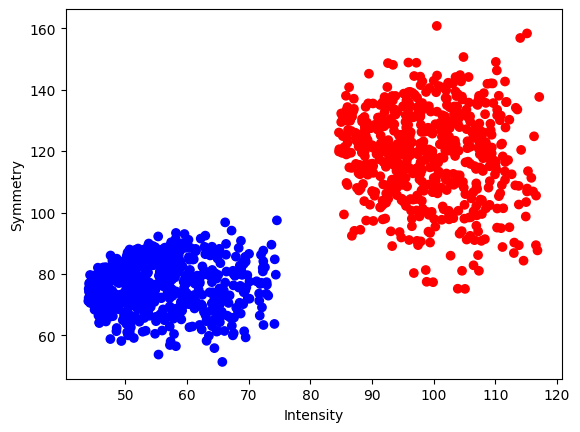

In [19]:
#Plot the train1x5 data in a graph, data with label = 1 plot in blue and with 𝑙𝑎𝑏𝑒𝑙 = 5 plot in red
colors = ['blue' if i == 1 else 'red' for i in y_train_1_5]

plt.scatter(X_train_1_5[:, 0], X_train_1_5[:, 1], color=colors)
plt.xlabel('Intensity')
plt.ylabel('Symmetry')
plt.show()

### Digit Classification 1x5
---

#### Using the PLA

In [20]:
#Putting the bias
X_train_1_5_bias = np.insert(X_train_1_5, 0, 1, axis=1)
X_test_1_5_bias = np.insert(X_test_1_5, 0, 1, axis=1)

In [21]:
X_train_1_5_bias,y_train_1_5

(array([[  1.        ,  44.70196078,  70.50196078],
        [  1.        ,  59.85098039,  79.65490196],
        [  1.        ,  48.55294118,  79.14509804],
        ...,
        [  1.        , 110.7254902 , 130.0627451 ],
        [  1.        ,  99.30588235, 140.54117647],
        [  1.        , 101.17254902, 126.6745098 ]]),
 array([ 1,  1,  1, ..., -1, -1, -1]))

In [22]:
from perceptron import PLA

# train the model

perceptron = PLA()

%time perceptron.fit(X_train_1_5_bias,y_train_1_5)

# test the model

y_pred = perceptron.predict(X_test_1_5_bias)
for i in range(5):
    print(f"Prediction: {y_pred[i]} | Actual value: {y_test_1_5[i]}")

# ranking report
print(" ---- Perceptron Report ---- ")
print(ClassificationReport(y_test_1_5, y_pred))

w0_PLA = perceptron.get_w()
print(w0_PLA)

"""

Generate the confusion matrix and effectiveness report for each classifier


"""

number of iterations -> 30000
CPU times: user 619 ms, sys: 2.48 ms, total: 621 ms
Wall time: 631 ms
Prediction: 1.0 | Actual value: 1
Prediction: 1.0 | Actual value: 1
Prediction: 1.0 | Actual value: 1
Prediction: 1.0 | Actual value: 1
Prediction: 1.0 | Actual value: 1
 ---- Perceptron Report ---- 
  precision    recall     f1-score    support
-1   0.82        0.82        0.82       291.00
1   0.82        0.82        0.82       292.00

accuracy: 0.82

Confusion Matrix: 
             Positive    Negative
Positive       479         104
Negative       104         479
[7460.         -331.23921569  182.05490196]


'\n\nGenerate the confusion matrix and effectiveness report for each classifier\n\n\n'

---
#### Using Logistic Regression


In [23]:
from linearregression import LinearRegression

# do the same experiment using linear regression
linear_regression = LinearRegression()

%time linear_regression.fit(X_train_1_5_bias,y_train_1_5)

y_pred = linear_regression.predict(X_test_1_5_bias)
for i in range(5):
    print(f"Prediction: {y_pred[i]} | Actual value: {y_test_1_5[i]}")

# ranking report
print(" ---- Linear Regression Report ---- ")
print(ClassificationReport(y_test_1_5, y_pred))

w0_LR = linear_regression.get_w()
print(w0_LR)

CPU times: user 217 µs, sys: 1.03 ms, total: 1.24 ms
Wall time: 1.26 ms
Prediction: 1.0 | Actual value: 1
Prediction: 1.0 | Actual value: 1
Prediction: 1.0 | Actual value: 1
Prediction: 1.0 | Actual value: 1
Prediction: 1.0 | Actual value: 1
 ---- Linear Regression Report ---- 
  precision    recall     f1-score    support
-1   1.00        1.00        1.00       291.00
1   1.00        1.00        1.00       292.00

accuracy: 1.00

Confusion Matrix: 
             Positive    Negative
Positive       583         0
Negative       0         583
[ 3.57247074 -0.03004415 -0.01274828]



---
#### Using Logistic Regression


In [24]:
from logistic_regression import LogisticRegression
logistic_regression = LogisticRegression(tmax=50_000)

%time logistic_regression.fit(X_train_1_5_bias,y_train_1_5)

y_pred = logistic_regression.predict(X_test_1_5_bias)
for i in range(5):
    print(f"Prediction: {y_pred[i]} | Actual value: {y_test_1_5[i]}")

    # ranking report
print(" ---- Logistic Regression Report ---- ")
print(ClassificationReport(y_test_1_5, y_pred))

w0_Logistic = logistic_regression.get_w()
print(w0_Logistic)

/content/logistic_regression.py:28: RuntimeWarning: overflow encountered in exp
  gt = (-1/N) * np.dot(X_batch.T, y_batch/(1 + np.exp(y_batch * np.dot(X_batch, self.w))))


CPU times: user 2.49 s, sys: 21.2 ms, total: 2.51 s
Wall time: 2.53 s
Prediction: 1.0 | Actual value: 1
Prediction: 1.0 | Actual value: 1
Prediction: 1.0 | Actual value: 1
Prediction: 1.0 | Actual value: 1
Prediction: 1.0 | Actual value: 1
 ---- Logistic Regression Report ---- 
  precision    recall     f1-score    support
-1   1.00        1.00        1.00       291.00
1   1.00        1.00        1.00       292.00

accuracy: 1.00

Confusion Matrix: 
             Positive    Negative
Positive       583         0
Negative       0         583
[506.50164084  -8.03326706   1.31444705]


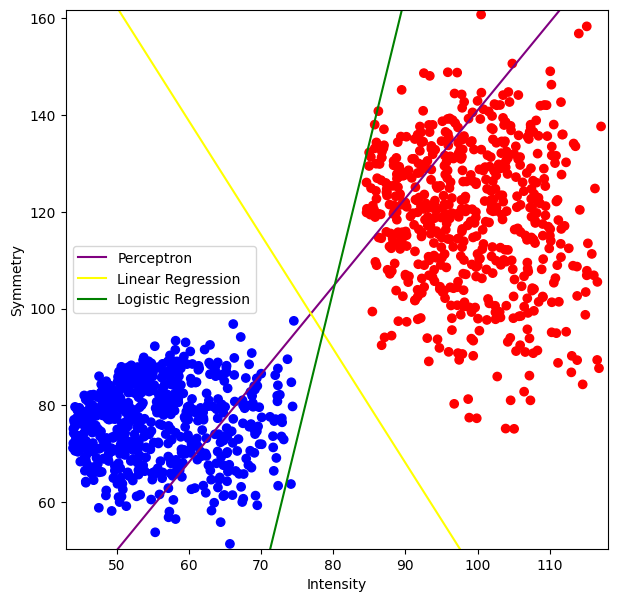

In [25]:
plt.figure(figsize=(7,7)) #Increases the size of the figure
plt.axis([min(X_train_1_5[:,0]) - 1, max(X_train_1_5[:,0]) + 1, min(X_train_1_5[:,1]) - 1, max(X_train_1_5[:,1]) + 1]) #set the size of the x and y axes

#plot in blue of the points with label 1 and red with label 5
colors = ['blue' if i == 1 else 'red' for i in y_train_1_5]
plt.scatter(X_train_1_5[:, 0], X_train_1_5[:, 1], color=colors)

#plot of perceptron separation line
x = np.linspace(min(X_train_1_5[:,0]) - 1, max(X_train_1_5[:,0]) + 1, 100)
y = -(w0_PLA[1] * x + w0_PLA[0]) / w0_PLA[2]
plt.plot(x, y, color='purple', label='Perceptron')

#plot of linear regression separation line
x = np.linspace(min(X_train_1_5[:,0]) - 1, max(X_train_1_5[:,0]) + 1, 100)
y = -(w0_LR[1] * x + w0_LR[0]) / w0_LR[2]
plt.plot(x, y, color='yellow', label='Linear Regression')

#plot of the logistic regression separation line
x = np.linspace(min(X_train_1_5[:,0]) - 1, max(X_train_1_5[:,0]) + 1, 100)
y = -(w0_Logistic[1] * x + w0_Logistic[0]) / w0_Logistic[2]
plt.plot(x, y, color='green', label='Logistic Regression')


plt.xlabel('Intensity')
plt.ylabel('Symmetry')
plt.legend()
plt.show()

# 3.3 Complete Digit Classifier
----

# One against all
#### Perceptron
----
The choice to start with the number 1 because it is linearly separable

In [26]:
# 1 against all, for this we remove the data with label = 0

X_train_one = X_train.copy()
X_test_one = X_test.copy()

y_train_one = np.where(y_train == 1, 1, -1)
y_test_one = np.where(y_test == 1, 1, -1)

print("Size of X_train_one: ", len(X_test_one), "Size of y_train_one: ", len(y_train_one))
print("Size of X_test_one: ", len(X_test_one), "Size of y_test_one: ", len(y_test_one))
X_train_one, y_train_one

Size of X_train_one:  1115 Size of y_train_one:  2186
Size of X_test_one:  1115 Size of y_test_one:  1115


(array([[145.43529412, 156.64313725],
        [118.57647059, 142.01568627],
        [127.6       , 113.23921569],
        ...,
        [110.7254902 , 130.0627451 ],
        [ 99.30588235, 140.54117647],
        [101.17254902, 126.6745098 ]]),
 array([-1, -1, -1, ..., -1, -1, -1]))

In [27]:
#Putting the bias
X_train_one_bias = np.insert(X_train_one, 0, 1, axis=1)
X_test_one_bias = np.insert(X_test_one, 0, 1, axis=1)

In [28]:
# One against all

perceptron = PLA(maxIter=1_000_000)

%time perceptron.fit(X_train_one_bias,y_train_one)

y_pred = perceptron.predict(X_test_one_bias)

print(" ---- Perceptron Report ---- ")
print(ClassificationReport(y_test_one, y_pred))

w1_PLA = perceptron.get_w()
print(w1_PLA)

number of iterations -> 68451
CPU times: user 1.95 s, sys: 3.49 ms, total: 1.95 s
Wall time: 1.98 s
 ---- Perceptron Report ---- 
  precision    recall     f1-score    support
-1   1.00        1.00        1.00       823.00
1   1.00        1.00        1.00       292.00

accuracy: 1.00

Confusion Matrix: 
             Positive    Negative
Positive       1115         0
Negative       0         1115
[16857.          -251.59607843    29.30980392]


#### Linear Regression
----

In [29]:
# The same experiment using the linear regression model
linear_regression = LinearRegression()

%time linear_regression.fit(X_train_one_bias,y_train_one)

y_pred = linear_regression.predict(X_test_one_bias)

print(" ---- Linear Regression Report ---- ")
print(ClassificationReport(y_test_one, y_pred))

w1_LR = linear_regression.get_w()
print(w1_LR)

CPU times: user 3.3 ms, sys: 1.02 ms, total: 4.32 ms
Wall time: 4.43 ms
 ---- Linear Regression Report ---- 
  precision    recall     f1-score    support
-1   1.00        1.00        1.00       823.00
1   1.00        1.00        1.00       292.00

accuracy: 1.00

Confusion Matrix: 
             Positive    Negative
Positive       1115         0
Negative       0         1115
[ 2.08185147 -0.02243541 -0.00421473]


#### Logistic Regression
----

In [30]:
#Now using the logistic regression model

logistic_regression = LogisticRegression(tmax=100_000)

%time logistic_regression.fit(X_train_one_bias,y_train_one)

y_pred = logistic_regression.predict(X_test_one_bias)

print(" ---- Logistic Regression Report ---- ")
print(ClassificationReport(y_test_one, y_pred))

w1_Logistic = logistic_regression.get_w()
print(w1_Logistic)

CPU times: user 4.18 s, sys: 11.3 ms, total: 4.19 s
Wall time: 4.28 s
 ---- Logistic Regression Report ---- 
  precision    recall     f1-score    support
-1   1.00        1.00        1.00       823.00
1   1.00        1.00        1.00       292.00

accuracy: 1.00

Confusion Matrix: 
             Positive    Negative
Positive       1114         1
Negative       1         1114
[255.64715033  -3.8028558    0.45057317]


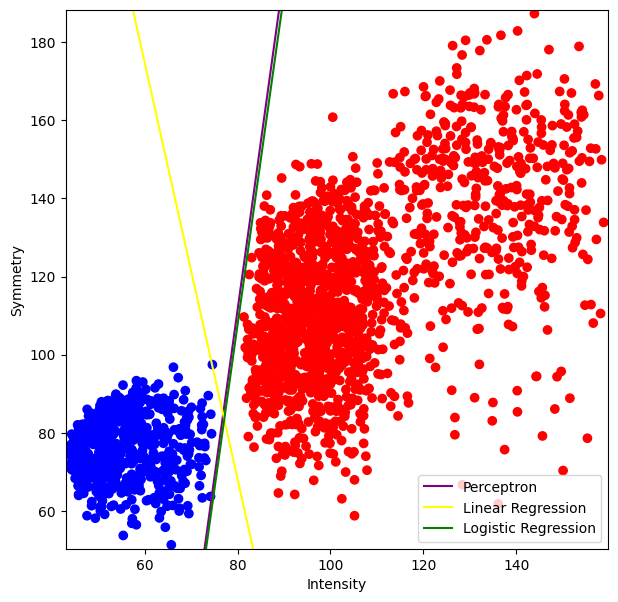

In [31]:
plt.figure(figsize=(7,7)) #Increases the size of the figure
plt.axis([min(X_train_one[:,0]) - 1, max(X_train_one[:,0]) + 1, min(X_train_one[:,1]) - 1, max(X_train_one[:,1]) + 1]) #set the size of the x and y axes

#plot in blue of the points with label 1 and red with label 5
colors = ['blue' if i == 1 else 'red' for i in y_train_one]
plt.scatter(X_train_one[:, 0], X_train_one[:, 1], color=colors)

# Domain of the function
x = np.linspace(min(X_train_one[:,0]) - 1, max(X_train_one[:,0]) + 1, 100)

#plot of perceptron separation line
y = -(w1_PLA[1] * x + w1_PLA[0]) / w1_PLA[2]
plt.plot(x, y, color='purple', label='Perceptron')

#plot of linear regression separation line
y = -(w1_LR[1] * x + w1_LR[0]) / w1_LR[2]
plt.plot(x, y, color='yellow', label='Linear Regression')

#plot of the logistic regression separation line
y = -(w1_Logistic[1] * x + w1_Logistic[0]) / w1_Logistic[2]
plt.plot(x, y, color='green', label='Logistic Regression')


plt.xlabel('Intensity')
plt.ylabel('Symmetry')
plt.legend()
plt.show()

# Zero Contra Todos
#### Perceptron
----

In [32]:
# To make the 0 against all, we need to remove the data with label = 1
# because we already did 1 against all

X_train_zero = X_train.copy()
X_test_zero = X_test.copy()

indexes = np.where(y_train != 1)[0]
indexes


X_train_zero = X_train_zero[indexes]
y_train_zero = y_train[indexes]

indexes = np.where(y_test != 1)[0]

X_test_zero = X_test_zero[indexes]
y_test_zero = y_test[indexes]

X_train_zero,y_train_zero

(array([[145.43529412, 156.64313725],
        [118.57647059, 142.01568627],
        [127.6       , 113.23921569],
        ...,
        [110.7254902 , 130.0627451 ],
        [ 99.30588235, 140.54117647],
        [101.17254902, 126.6745098 ]]),
 array([0, 0, 0, ..., 5, 5, 5]))

In [33]:
# Put all that are not 0 with label -1
y_train_zero = np.where(y_train_zero == 0, 1, -1)
y_test_zero = np.where(y_test_zero == 0, 1, -1)

print("Size of X_train_zero",len(X_train_zero),"Size of y_train_zero",len(y_train_zero))
print("Size of X_test_zero",len(X_test_zero),"Size of y_test_zero",len(y_test_zero))

y_train_zero,y_test_zero

Size of X_train_zero 1578 Size of y_train_zero 1578
Size of X_test_zero 823 Size of y_test_zero 823


(array([ 1,  1,  1, ..., -1, -1, -1]),
 array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  

In [34]:
#Putting the bias
X_train_zero_bias = np.insert(X_train_zero, 0, 1, axis=1)
X_test_zero_bias = np.insert(X_test_zero, 0, 1, axis=1)

In [35]:
#zero against all

perceptron = PLA(maxIter=15_000_000)

%time perceptron.fit(X_train_zero_bias,y_train_zero)

y_pred = perceptron.predict(X_test_zero_bias)

print(" ---- Perceptron Report ---- ")
print(ClassificationReport(y_test_zero, y_pred))

w0_PLA = perceptron.get_w()
print(w0_PLA)

number of iterations -> 15000000
CPU times: user 5min 41s, sys: 612 ms, total: 5min 42s
Wall time: 5min 46s
 ---- Perceptron Report ---- 
  precision    recall     f1-score    support
-1   0.97        1.00        0.98       605.00
1   1.00        0.91        0.95       218.00

accuracy: 0.98

Confusion Matrix: 
             Positive    Negative
Positive       803         20
Negative       20         803
[-4.63132000e+05  3.52146667e+03  2.74650980e+02]


#### Linear Regression
----

In [36]:
#This time using the linear regression model
linear_regression = LinearRegression()

%time linear_regression.fit(X_train_zero_bias,y_train_zero)

y_pred = linear_regression.predict(X_test_zero_bias)

print(" ---- Linear Regression Report ---- ")
print(ClassificationReport(y_test_zero, y_pred))

w0_LR = linear_regression.get_w()
print(w0_LR)

CPU times: user 373 µs, sys: 0 ns, total: 373 µs
Wall time: 294 µs
 ---- Linear Regression Report ---- 
  precision    recall     f1-score    support
-1   0.99        1.00        0.99       605.00
1   1.00        0.96        0.98       218.00

accuracy: 0.99

Confusion Matrix: 
             Positive    Negative
Positive       813         10
Negative       10         813
[-5.11155281  0.03748985  0.00548293]


#### Logistic Regression
----

In [37]:
# The same experiment using the logistic regression model

logistic_regression = LogisticRegression(tmax=500_000)

%time logistic_regression.fit(X_train_zero_bias,y_train_zero)

y_pred = logistic_regression.predict(X_test_zero_bias)

print(" ---- Logistic Regression Report ---- ")
print(ClassificationReport(y_test_zero, y_pred))

w0_Logistic = logistic_regression.get_w()
print(w0_Logistic)

CPU times: user 15.4 s, sys: 34.8 ms, total: 15.5 s
Wall time: 15.6 s
 ---- Logistic Regression Report ---- 
  precision    recall     f1-score    support
-1   1.00        0.99        0.99       605.00
1   0.97        0.99        0.98       218.00

accuracy: 0.99

Confusion Matrix: 
             Positive    Negative
Positive       813         10
Negative       10         813
[-1.20046299e+03  9.86369573e+00  5.03187605e-01]


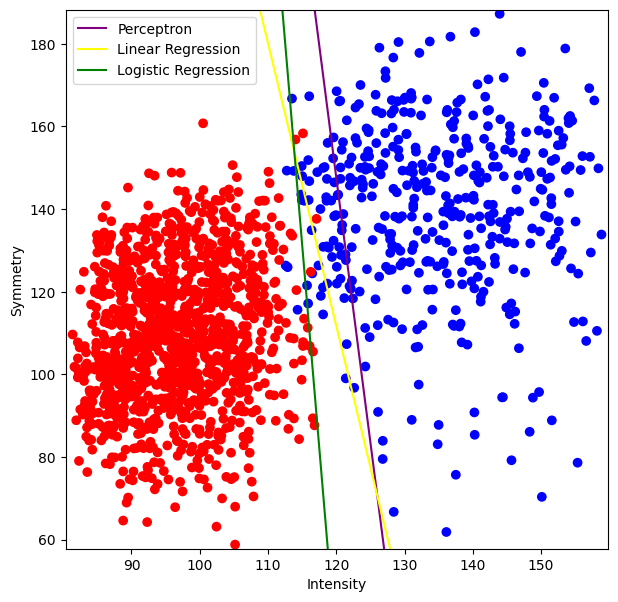

In [38]:
plt.figure(figsize=(7,7)) #Increases the size of the figure
plt.axis([min(X_train_zero[:,0]) - 1, max(X_train_zero[:,0]) + 1, min(X_train_zero[:,1]) - 1, max(X_train_zero[:,1]) + 1]) #set the size of the x and y axes

#plot in blue of the points with label 1 and red with label 5
colors = ['blue' if i == 1 else 'red' for i in y_train_zero]
plt.scatter(X_train_zero[:, 0], X_train_zero[:, 1], color=colors)

# Domain of functions
x = np.linspace(min(X_train_zero[:,0]) - 1, max(X_train_zero[:,0]) + 1, 100)

#plot of perceptron separation line
y = -(w0_PLA[1] * x + w0_PLA[0]) / w0_PLA[2]
plt.plot(x, y, color='purple', label='Perceptron')

#plot of linear regression separation line
y = -(w0_LR[1] * x + w0_LR[0]) / w0_LR[2]
plt.plot(x, y, color='yellow', label='Linear Regression')

#plot of the logistic regression separation line
y = -(w0_Logistic[1] * x + w0_Logistic[0]) / w0_Logistic[2]
plt.plot(x, y, color='green', label='Logistic Regression')



plt.xlabel('Intensity')
plt.ylabel('Symmetry')
plt.legend()
plt.show()

# Four Against All
----

In [39]:
# 4 against all, for this we remove the data with label = 0 and 1

X_train_four = X_train.copy()
X_test_four = X_test.copy()

indexes = np.where((y_train !=0) & (y_train !=1))[0]
print(indexes)

X_train_four = X_train_four[indexes]
y_train_four = y_train[indexes]

indexes = np.where(( (y_test !=0) & (y_test !=1) ))

X_test_four = X_train_four[indexes]
y_test_four = y_test[indexes]


X_train_four,y_train_four

[1033 1034 1035 ... 2183 2184 2185]


(array([[ 83.78431373,  83.99215686],
        [ 98.90980392,  82.49411765],
        [ 96.7372549 , 111.49803922],
        ...,
        [110.7254902 , 130.0627451 ],
        [ 99.30588235, 140.54117647],
        [101.17254902, 126.6745098 ]]),
 array([4, 4, 4, ..., 5, 5, 5]))

In [40]:
# Sort the counter-all
y_train_four = np.where(y_train_four == 4, 1, -1)
y_test_four = np.where(y_test_four == 4, 1, -1)


print("Size of X_train_four: ",len(X_train_four),"Size of y_train_four: ",len(y_train_four))
print("Size of X_test_four: ",len(X_test_four),"Size of y_test_four: ",len(y_test_four))

y_train_four,y_test_four

Size of X_train_four:  1153 Size of y_train_four:  1153
Size of X_test_four:  605 Size of y_test_four:  605


(array([ 1,  1,  1, ..., -1, -1, -1]),
 array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  

#### Perceptron
----

In [41]:
#Putting the bias
X_train_four_bias = np.insert(X_train_four,0,1,axis=1)
X_test_four_bias = np.insert(X_test_four,0,1,axis=1)

In [42]:
#Four against all with the perceptron model

perceptron = PLA(maxIter=10_000_000)

%time perceptron.fit(X_train_four_bias,y_train_four)

# test the model

y_pred = perceptron.predict(X_test_four_bias)


# ranking report
print(" ---- Perceptron Report ---- ")
print(ClassificationReport(y_test_four, y_pred))

w4_PLA = perceptron.get_w()
print(w4_PLA)

number of iterations -> 10000000
CPU times: user 3min 43s, sys: 396 ms, total: 3min 44s
Wall time: 3min 46s
 ---- Perceptron Report ---- 
  precision    recall     f1-score    support
-1   0.53        0.59        0.56       291.00
1   0.58        0.52        0.55       314.00

accuracy: 0.56

Confusion Matrix: 
             Positive    Negative
Positive       336         269
Negative       269         336
[122674.           -650.16470588   -509.00392156]


#### Linear Regression
----

In [43]:
# do the same experiment using linear regression
linear_regression = LinearRegression()

%time linear_regression.fit(X_train_four_bias,y_train_four)

y_pred = linear_regression.predict(X_test_four_bias)

# ranking report
print(" ---- Linear Regression Report ---- ")
print(ClassificationReport(y_test_four, y_pred))

w4_LR = linear_regression.get_w()
print(w4_LR)

CPU times: user 1.3 ms, sys: 3 ms, total: 4.3 ms
Wall time: 8.14 ms
 ---- Linear Regression Report ---- 
  precision    recall     f1-score    support
-1   0.53        0.77        0.63       291.00
1   0.63        0.37        0.47       314.00

accuracy: 0.56

Confusion Matrix: 
             Positive    Negative
Positive       340         265
Negative       265         340
[ 5.98093509 -0.02763204 -0.03026314]


#### Logistic Regression
----

In [44]:
logistic_regression = LogisticRegression(tmax=2_500_000, bs=256,eta=0.01)

%time logistic_regression.fit(X_train_four_bias,y_train_four)

y_pred = logistic_regression.predict(X_test_four_bias)

# ranking report
print(" ---- Logistic Regression Report ---- ")
print(ClassificationReport(y_test_four, y_pred))

w4_Logistic = logistic_regression.get_w()
print(w4_Logistic)

#41s - no batch
#2m40s - 128 batch
#5m26s - 300 batch
#9m - 500 batch

CPU times: user 18min 57s, sys: 2.38 s, total: 19min
Wall time: 19min 9s
 ---- Logistic Regression Report ---- 
  precision    recall     f1-score    support
-1   0.53        0.34        0.42       291.00
1   0.54        0.72        0.62       314.00

accuracy: 0.54

Confusion Matrix: 
             Positive    Negative
Positive       327         278
Negative       278         327
[61.17928443 -0.1395087  -0.37706137]


#### Logistic Regression - Weight Decay
----

In [45]:
from regularizated_logistic import LogisticRegressionRegularized

logistic_regression_regularized = LogisticRegressionRegularized(tmax=2_500_000, bs=128, lamb=1e-3,eta=0.01)

%time logistic_regression_regularized.fit(X_train_four_bias,y_train_four)

y_pred = logistic_regression_regularized.predict(X_test_four_bias)

# ranking report
print(" ---- Regularized Logistic Regression Report ---- ")
print(ClassificationReport(y_test_four, y_pred))

w4_Logistic_regularized = logistic_regression_regularized.get_w()
print(w4_Logistic_regularized)

CPU times: user 9min 47s, sys: 1.08 s, total: 9min 48s
Wall time: 9min 51s
 ---- Regularized Logistic Regression Report ---- 
  precision    recall     f1-score    support
-1   0.55        0.37        0.45       291.00
1   0.55        0.72        0.62       314.00

accuracy: 0.55

Confusion Matrix: 
             Positive    Negative
Positive       334         271
Negative       271         334
[ 0.95202726  0.2105827  -0.1711267 ]


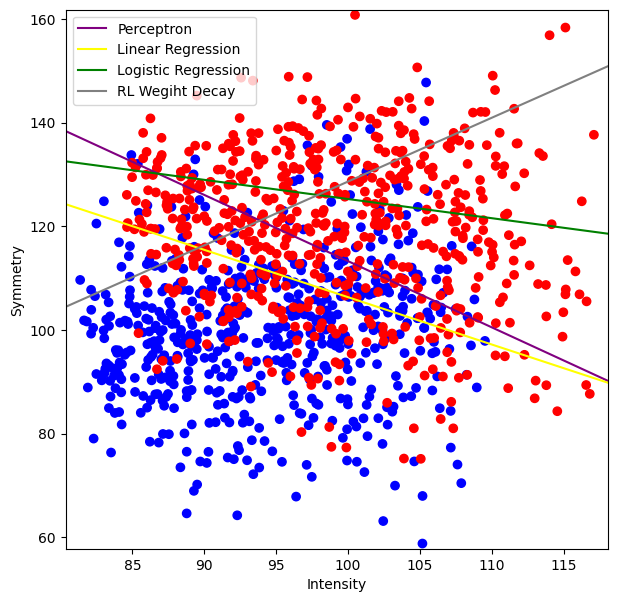

In [46]:
plt.figure(figsize=(7,7)) #Increases the size of the figure
plt.axis([min(X_train_four[:,0]) - 1, max(X_train_four[:,0]) + 1, min(X_train_four[:,1]) - 1, max(X_train_four[:,1]) + 1]) #set the size of the x and y axes

#plot in blue of the points with label 1 and red with label 5
colors = ['blue' if i == 1 else 'red' for i in y_train_four]
plt.scatter(X_train_four[:, 0], X_train_four[:, 1], color=colors)

# Domain of functions
x = np.linspace(min(X_train_four[:,0]) - 1, max(X_train_four[:,0]) + 1, 100)


#plot of perceptron separation line
y = -(w4_PLA[1] * x + w4_PLA[0]) / w4_PLA[2]
plt.plot(x, y, color='purple', label='Perceptron')

#plot of linear regression separation line
y = -(w4_LR[1] * x + w4_LR[0]) / w4_LR[2]
plt.plot(x, y, color='yellow', label='Linear Regression')

#plot of the logistic regression separation line
y = -(w4_Logistic[1] * x + w4_Logistic[0]) / w4_Logistic[2]
plt.plot(x, y, color='green', label='Logistic Regression')

#plot of the separation line of the Weight Decay Logistic regression
y = -(w4_Logistic_regularized[1] * x + w4_Logistic_regularized[0]) / w4_Logistic_regularized[2]
plt.plot(x,y,color='grey',label = 'RL Wegiht Decay')


plt.xlabel('Intensity')
plt.ylabel('Symmetry')
plt.legend()
plt.show()

#### Multiclass Classification:
----

In [47]:
# open a png photo and show it
from PIL import Image

def image_converter(path):
    # show the image
    img = Image.open(path)
    plt.imshow(img)


    # convert the image to an array
    img = np.array(img)

    #calculate the intensity and symmetrys
    img_intensity = intensity(sum(img))
    SV = vertical_symmetry(img)
    SH = horizontal_symmetry(img)

    return [img_intensity, SV + SH]

In [48]:
#classifier using sign to sort and iterating over each weight
def classifier(x, weights):
    #classifies x as 0,1,4 or 5
    #x is an array with intensity and symmetry
    # put the bias in the x

    x = [1,x[0],x[1]]

    for i in range(len(weights)):
        #use the sign activation function to sort
        if np.sign(np.dot(weights[i],x)) == 1:
            return i

        else:
            if i == 4:
                return 5

<ipython-input-8-ccbd47302900>:8: RuntimeWarning: overflow encountered in ubyte_scalars
  diff = abs( digit[i][j] - digit[i][27 - j] )


[0.19215686274509805, 39.14509803921568]
The image is a:  0


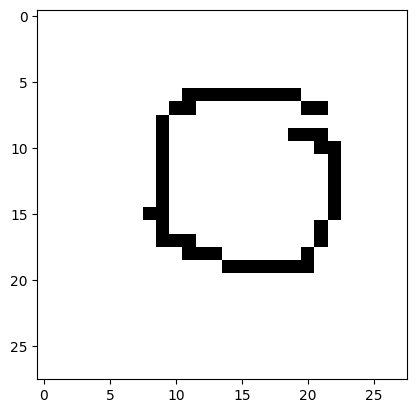

In [49]:
x = image_converter('number_zero.png')
print(x)
result = classifier(x,[w1_Logistic,w0_Logistic,w4_Logistic])
print("The image is a: ",result)